# Synthetic Dataset Creation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
n_features = 20   # Total number of features
n_meaningful = 2  # Number of meaningful features

## Train set

In [4]:
# Parameters
n_regular = 900  # Number of regular data points
n_anomalous = 100  # Number of anomalous data points

# Generate regular data
rho_regular = np.random.uniform(0, 3, n_regular)
theta_regular = np.random.uniform(0, 2 * np.pi, n_regular)
meaningful_regular = np.column_stack((rho_regular * np.cos(theta_regular), 
                                      rho_regular * np.sin(theta_regular)))

# Generate anomalous data
rho_anomalous = np.random.uniform(4, 30, n_anomalous)
theta_anomalous = np.random.uniform(0, 2 * np.pi, n_anomalous)
meaningful_anomalous = np.column_stack((rho_anomalous * np.cos(theta_anomalous), 
                                        rho_anomalous * np.sin(theta_anomalous)))

# Combine meaningful features
meaningful_features = np.vstack((meaningful_regular, meaningful_anomalous))

# Generate noise features
noise_features = np.random.normal(0, 1, (n_regular + n_anomalous, n_features - n_meaningful))

# Combine meaningful and noise features
data = np.hstack((meaningful_features, noise_features))

# Create labels (0 for regular, 1 for anomalous)
labels = np.array([0] * n_regular + [1] * n_anomalous)

columns = [f"Feature_{i+1}" for i in range(n_features)]
train_df = pd.DataFrame(data, columns=columns)
train_df['Label'] = labels

print(train_df.head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.661091   1.350615  -0.331028   0.754788   1.717230  -0.938661   
1  -0.482620   1.082253   0.887838   0.869664  -0.071087  -1.219376   
2  -2.008047   1.961167  -0.435651  -2.989924  -0.943234  -0.237237   
3  -1.628126  -0.736245   0.537256   0.586914   0.473349   0.387532   
4  -0.839244  -0.815499  -0.554392  -0.695668  -0.183774   2.142696   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_12  Feature_13  \
0   1.620708   0.117258   0.314047   -1.181097  ...   -0.749496   -0.284662   
1   1.658909  -0.268167   0.272338    0.237309  ...    1.188758    0.728248   
2   1.056785   0.039569  -0.092698   -0.757069  ...   -2.278434    0.300807   
3  -1.730112   0.430263  -1.022032    0.390874  ...   -0.709927    0.852392   
4  -0.608467   1.614730   0.281895    1.160161  ...   -0.766572    0.510673   

   Feature_14  Feature_15  Feature_16  Feature_17  Feature_18  Feature_19  \
0   -0.439518    0.83

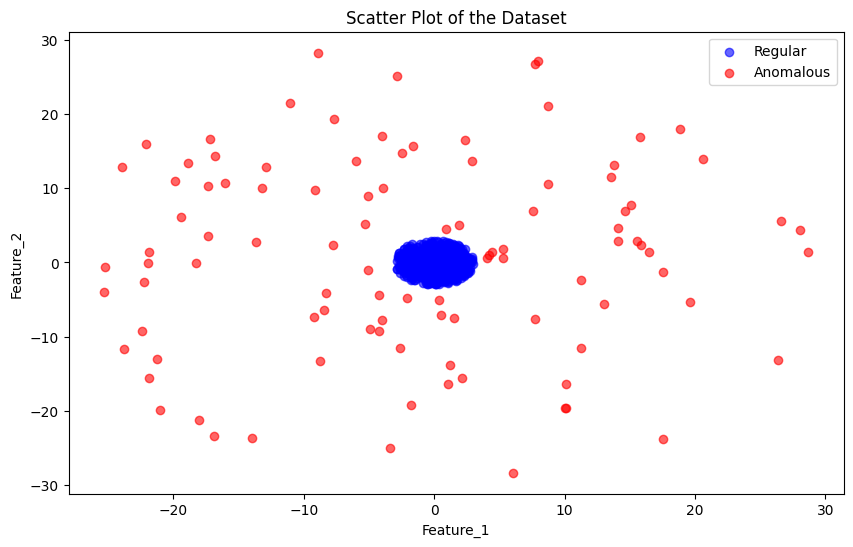

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df[train_df['Label'] == 0]['Feature_1'], train_df[train_df['Label'] == 0]['Feature_2'], 
            label='Regular', alpha=0.6, c='blue')
plt.scatter(train_df[train_df['Label'] == 1]['Feature_1'], train_df[train_df['Label'] == 1]['Feature_2'], 
            label='Anomalous', alpha=0.6, c='red')

plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.title('Scatter Plot of the Dataset')
plt.legend()
plt.show()

In [ ]:
train_set = np.column_stack((data, labels))
tr_save = pd.DataFrame(train_set)

tr_save.to_pickle("dataset/syn_train.pkl")

## Test set

In [7]:
# Parameters
n_anomalous_test = 100  # Number of anomalous data points in the test set

# Generate anomalous test data
rho_anomalous_test = np.random.uniform(4, 30, n_anomalous_test)
theta_anomalous_test = np.random.uniform(0, 2 * np.pi, n_anomalous_test)
meaningful_anomalous_test = np.column_stack((rho_anomalous_test * np.cos(theta_anomalous_test), 
                                             rho_anomalous_test * np.sin(theta_anomalous_test)))

# Generate noise features for the test set
noise_features_test = np.random.normal(0, 1, (n_anomalous_test, n_features - n_meaningful))

# Combine meaningful and noise features for the test set
data_test = np.hstack((meaningful_anomalous_test, noise_features_test))

# Create labels for the test set (0 for regular, 1 for anomalous)
labels_test = np.array([1] * n_anomalous_test)

columns = [f"Feature_{i+1}" for i in range(n_features)]
df_test = pd.DataFrame(data_test, columns=columns)
df_test['Label'] = labels_test

print(df_test.head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0 -14.781925  -2.223362   0.446700   2.227745  -0.238695  -0.380352   
1  -1.973567  -4.467394  -1.653694  -1.228952   0.559351  -1.485630   
2 -24.227582 -11.038727  -0.662533   1.858079   2.228983   2.723681   
3 -23.524710   8.627647   2.355732   1.754172  -0.601167  -0.103854   
4  29.611524  -1.673463   0.201544   0.791597   0.621916  -1.141302   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_12  Feature_13  \
0   1.576854   0.009688   0.022761    0.810252  ...    0.150342   -0.261805   
1   0.865363  -1.407476  -0.719678   -1.308026  ...   -1.230138   -1.176745   
2   0.884424   0.311063  -1.950675    1.697835  ...   -0.290125    0.537869   
3   0.890677   0.243246   0.050429   -1.075268  ...    1.057054    1.144040   
4  -0.769192  -0.692202   1.217903    0.718367  ...   -0.339508   -0.072389   

   Feature_14  Feature_15  Feature_16  Feature_17  Feature_18  Feature_19  \
0    0.191865   -0.21

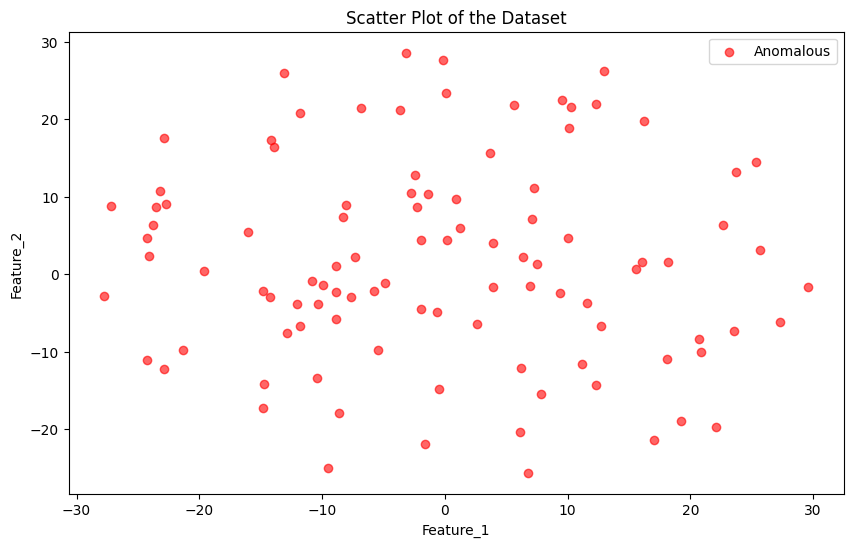

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df_test[df_test['Label'] == 1]['Feature_1'], df_test[df_test['Label'] == 1]['Feature_2'], 
            label='Anomalous', alpha=0.6, c='red')

plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.title('Scatter Plot of the Dataset')
plt.legend()
plt.show()

In [9]:
test_set = np.column_stack((data_test, labels_test))
te_save = pd.DataFrame(test_set)

te_save.to_pickle("dataset/syn_test.pkl")